# qBraid-SDK: Visualization

In this notebook, we'll go through some of the main features of the `qbraid.visualization` library.

## Circuit Drawer

First, we utilize the `circuit_drawer` function. This function takes in any type of support quantum circuit, and draws it out in the console.

In [1]:
from qbraid.interface import random_circuit
from qbraid.visualization import circuit_drawer

braket_circuit = random_circuit("braket")
circuit_drawer(braket_circuit)

T  : |0|1|
          
q0 : -X-S-

T  : |0|1|


Let's take this circuit and transpile it to another language to see that it can still be visualized.

In [2]:
from qbraid.transpiler import transpile

qiskit_circuit = transpile(braket_circuit, "qiskit")
circuit_drawer(qiskit_circuit)

┌───┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ S ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0

Additionally, if the library you are working with has options for visualization, those options can be expressed as `kwargs` in `circuit_drawer`. For example:

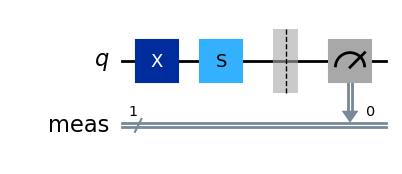

In [3]:
circuit_drawer(qiskit_circuit, output="mpl")

## Conversion Graphs

Given a `ConversionGraph`, you can use `plot_conversion_graph` to display the connections between different quantum frameworks.

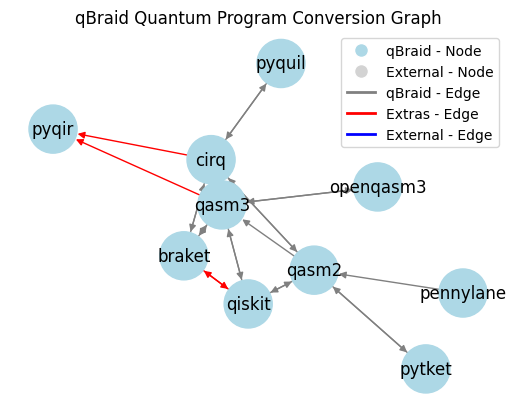

In [4]:
from qbraid.transpiler import ConversionGraph
from qbraid.visualization import plot_conversion_graph

graph = ConversionGraph()
plot_conversion_graph(graph, legend=True)

## Histograms/Distributions

When you have a qBraid quantum job, you can get the measurement counts from it and also plot it using the qBraid-SDK.

In [1]:
from qbraid.runtime.braket import BraketProvider

provider = BraketProvider()
provider.get_devices()

[<qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Aria-2')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Forte-1')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:us-east-1::device/qpu/ionq/Harmony')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:::device/quantum-simulator/amazon/sv1')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:::device/quantum-simulator/amazon/tn1')>,
 <qbraid.runtime.braket.device.BraketDevice('arn:aws:braket:::device/quantum-simulator/amazon/dm1')>]

In [2]:
device = provider.get_device("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

In [3]:
from braket.circuits import Circuit

circuit = Circuit().h(0).cnot(0, 1)
result = device.run(circuit, shots=1000).result()

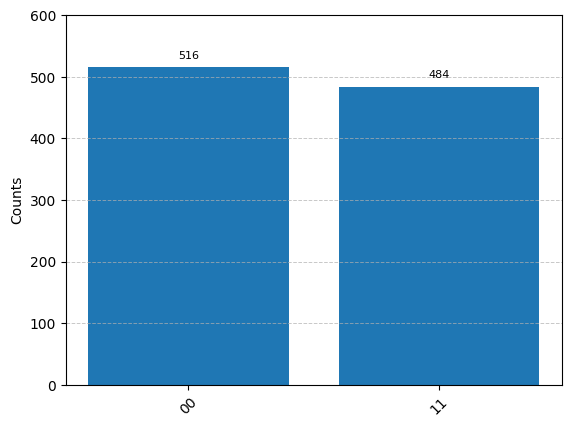

In [7]:
from qbraid.visualization import plot_histogram, plot_distribution

plot_histogram(result.raw_counts())

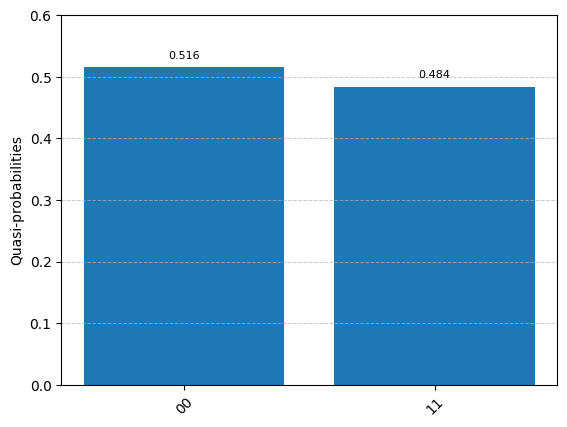

In [8]:
plot_distribution(result.raw_counts())